In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

survey = pd.read_csv('../tech/survey.csv')

#Drop features we are not going to use
survey  = survey.drop(['state','self_employed','family_history', 'care_options', 'leave', 'anonymity', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'seek_help', 'phys_health_consequence', 'mental_vs_physical', 'obs_consequence', 'comments'],axis=1)

survey = pd.DataFrame(survey) 

#Look at the first 5 rows of our training data
print(survey.head(5))


             Timestamp  Age  Gender         Country treatment work_interfere  \
0  2014-08-27 11:29:31   37  Female   United States       Yes          Often   
1  2014-08-27 11:29:37   44       M   United States        No         Rarely   
2  2014-08-27 11:29:44   32    Male          Canada        No         Rarely   
3  2014-08-27 11:29:46   31    Male  United Kingdom       Yes          Often   
4  2014-08-27 11:30:22   31    Male   United States        No          Never   

     no_employees remote_work tech_company    benefits wellness_program  \
0            6-25          No          Yes         Yes               No   
1  More than 1000          No           No  Don't know       Don't know   
2            6-25          No          Yes          No               No   
3          26-100          No          Yes          No               No   
4         100-500         Yes          Yes         Yes       Don't know   

  mental_health_consequence  
0                        No  
1       

### Data Pre-processing

#### Handling Missing data

In [3]:
#count number of elements in each column to see if there are any missing values 
print(survey.count())

#Combining missing values in work_interference with "never"
survey['work_interfere'].fillna(value = 'Never', inplace = True)



Timestamp                    1259
Age                          1259
Gender                       1259
Country                      1259
treatment                    1259
work_interfere                995
no_employees                 1259
remote_work                  1259
tech_company                 1259
benefits                     1259
wellness_program             1259
mental_health_consequence    1259
dtype: int64


#### Cleaning data

In [4]:
##GENDER

# There are many typos and many groups, make it short to fit 3 groups
survey['Gender'].value_counts()

#male
survey['Gender'] = survey['Gender'].replace(['male','M','m','Make', 'Man', 'Maile', 'maile', 'Malr', 'Maile', 'Mail', 'msle', 'Mal', 'Male '], 'Male')
#female
survey['Gender'] = survey['Gender'].replace(['female','F','f','Woman','femail','woman', 'Man', 'Maile', 'Malr', 'Female ', 'Femake' ], 'Female')
#LGBTQ+
survey['Gender'] = survey['Gender'].replace(['Cis Female', 'Female (trans)','Cis Male','Guy (-ish) ^_^','Male-ish','non-binary','queer/she/they', 'Trans-female', 'fluid', 'queer', 'cis male', 'All','Trans woman','Agender','ostensibly male, unsure what that really means','Male (CIS)','male leaning androgynous','cis-female/femme', 'p', 'Genderqueer', 'Neuter', 'Enby', 'Androgyne', 'Nah', 'Female (cis)', 'Cis Man', 'something kinda male?', 'A little about you' ], 'LGBTQ...')



In [5]:
##AGE
print(survey['Age'].unique())

#delete ages less than 0 and greater than 100
survey.drop(survey[survey['Age'] < 0].index, inplace = True) 
survey.drop(survey[survey['Age'] > 100].index, inplace = True)

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


### Visualizations

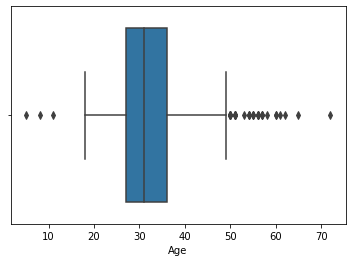

In [6]:
#Box plot showing Age distribution of the employees

sns.boxplot(survey['Age'])

#the outliers for age less than 20 is kind of odd, those children must be gifted


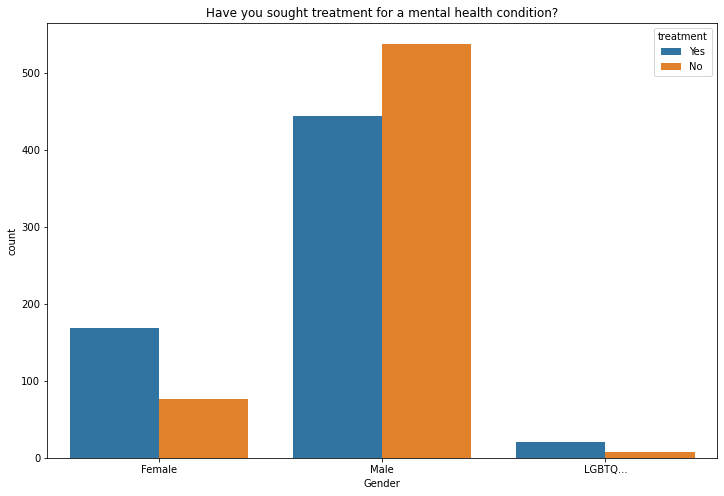

In [7]:
# Let's see how many different sexes get tretment
plt.figure(figsize=(12,8))
plt.title('Have you sought treatment for a mental health condition?')
sns.countplot(x = 'Gender', data = survey, hue = 'treatment')
plt.show()

Men are less likely to seek treatment for mental health 

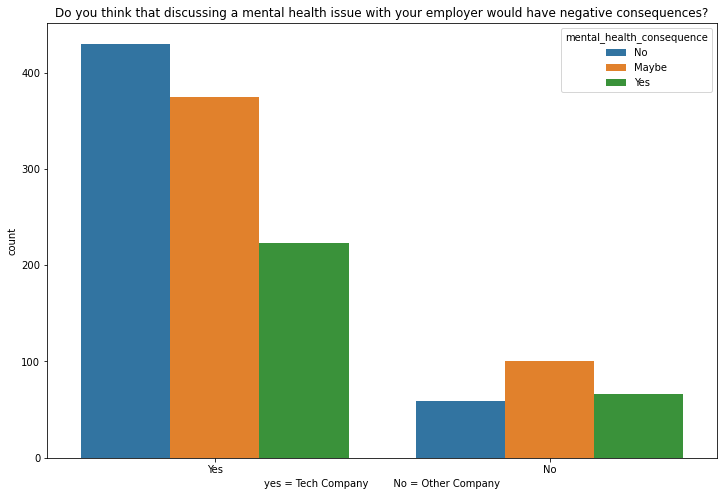

In [8]:
# Let's see how many people has been treated
plt.figure(figsize=(12,8))
plt.title('Do you think that discussing a mental health issue with your employer would have negative consequences?')

sns.countplot(x = 'tech_company', data = survey, hue = 'mental_health_consequence')
plt.xlabel('yes = Tech Company        No = Other Company')
plt.show()

Compared to other companies, it's less risky to discuss mental health issues in tech companies

In [9]:
country = survey.groupby(survey["Country"])
country['treatment','wellness_program','benefits'].describe()

<ipython-input-9-4fabc3c6edcc>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  country['treatment','wellness_program','benefits'].describe()


treatment                  wellness_program         \
                           count unique  top freq            count unique   
Country                                                                     
Australia                     21      2  Yes   13               21      3   
Austria                        3      1   No    3                3      1   
Bahamas, The                   1      1  Yes    1                1      1   
Belgium                        6      2   No    5                6      1   
Bosnia and Herzegovina         1      1   No    1                1      1   
Brazil                         6      2   No    4                6      1   
Bulgaria                       4      2   No    2                4      1   
Canada                        72      2  Yes   37               72      3   
China                          1      1   No    1                1      1   
Colombia                       2      1   No    2                2      1   
Costa Rica                     1      1   No    1                1      1   
Croatia                        2      1  Yes    2                2      1   
Czech Republic                 1      1   No    1                1      1   
Denmark                        2      1  Yes    2                2      1   
Finland                        3      2   No    2                3      1   
France                        13      2   No   11               13      3   
Georgia                        1      1   No    1                1      1   
Germany                       45      2   No   24               45      3   
Greece                         2      1   No    2                2      1   
Hungary                        1      1   No    1                1      1   
India                         10      2   No    7               10      2   
Ireland                       27      2   No   14               27      3   
Israel                         5      1   No    5                5      3   
Italy                          7      2   No    6                7      2   
Japan                          1      1  Yes    1                1      1   
Latvia                         1      1   No    1                1      1   
Mexico                         3      2   No    2                3      1   
Moldova                        1      1  Yes    1                1      1   
Netherlands                   27      2   No   18               27      3   
New Zealand                    8      2  Yes    5                8      3   
Nigeria                        1      1   No    1                1      1   
Norway                         1      1   No    1                1      1   
Philippines                    1      1   No    1                1      1   
Poland                         7      2  Yes    4                7      2   
Portugal                       2      1   No    2                2      1   
Romania                        1      1   No    1                1      1   
Russia                         3      1   No    3                3      1   
Singapore                      4      2   No    3                4      1   
Slovenia                       1      1  Yes    1                1      1   
South Africa                   6      2  Yes    4                6      1   
Spain                          1      1   No    1                1      1   
Sweden                         7      2   No    5                7      3   
Switzerland                    7      2   No    4                7      2   
Thailand                       1      1   No    1                1      1   
United Kingdom               184      2   No   92              184      3   
United States                748      2  Yes  408              748      3   
Uruguay                        1      1   No    1                1      1   

                                        benefits                          
                               top freq    count unique         top freq  
Country               

In [10]:
#Before converting categorical values to numerical values
survey.head(5)

,Timestamp,Age,Gender,Country,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,wellness_program,mental_health_consequence
0,2014-08-27 11:29:31,37,Female,United States,Yes,Often,6-25,No,Yes,Yes,No,No
1,2014-08-27 11:29:37,44,Male,United States,No,Rarely,More than 1000,No,No,Don't know,Don't know,Maybe
2,2014-08-27 11:29:44,32,Male,Canada,No,Rarely,6-25,No,Yes,No,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,Yes,Often,26-100,No,Yes,No,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,No,Never,100-500,Yes,Yes,Yes,Don't know,No


#### Check for any odd values in all the columns

In [11]:
print("Work Interfere", survey['work_interfere'].unique())

print("Remote Work", survey['remote_work'].unique())

print("Tech Company", survey['tech_company'].unique())

print("Benefits", survey['benefits'].unique())

print("Wellness Program", survey['wellness_program'].unique())

print("Mental Health Consequences", survey['mental_health_consequence'].unique())

print("Country", survey['Country'].unique())



Work Interfere ['Often' 'Rarely' 'Never' 'Sometimes']
Remote Work ['No' 'Yes']
Tech Company ['Yes' 'No']
Benefits ['Yes' "Don't know" 'No']
Wellness Program ['No' "Don't know" 'Yes']
Mental Health Consequences ['No' 'Maybe' 'Yes']
Country ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Bahamas, The' 'Greece' 'Moldova'
 'Georgia' 'China' 'Czech Republic' 'Philippines']


#### Converting variables to use it for building Machine Learning model

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#GENDER
#Female:0, LGBTQ+:1, Male:2
survey['Gender'] = le.fit_transform(survey['Gender'])

#TREATMENT
#Yes:1, No:0
survey['treatment'] = le.fit_transform(survey['treatment'])

#TECH COMPANY
#Yes:1, No:0
survey['tech_company'] = le.fit_transform(survey['tech_company'])

#BENEFITS
#Yes:2, No:1, Don't Know:0
survey['benefits'] = le.fit_transform(survey['benefits'])


#WELLNESS PROGRAM
#Yes:2, No:1, Don't Know: 0
survey['wellness_program'] = le.fit_transform(survey['wellness_program'])

#MENTAL HEALTH CONSEQUENCES
#Yes:2, No:1, Maybe: 0
survey['mental_health_consequence'] = le.fit_transform(survey['mental_health_consequence'])

#REMOTE WORK
#Yes:2, No:1
survey['remote_work'] = le.fit_transform(survey['remote_work'])

#WORK INTERFERE
#Often:1, Rare:2, Sometimes:3, Never:0
survey['work_interfere'] = le.fit_transform(survey['work_interfere'])





In [13]:
#After converting to numerical value

survey.head(5)

,Timestamp,Age,Gender,Country,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,wellness_program,mental_health_consequence
0,2014-08-27 11:29:31,37,0,United States,1,1,6-25,0,1,2,1,1
1,2014-08-27 11:29:37,44,2,United States,0,2,More than 1000,0,0,0,0,0
2,2014-08-27 11:29:44,32,2,Canada,0,2,6-25,0,1,1,1,1
3,2014-08-27 11:29:46,31,2,United Kingdom,1,1,26-100,0,1,1,1,2
4,2014-08-27 11:30:22,31,2,United States,0,0,100-500,1,1,2,0,1


### decision tree implmentation, evaluation, and visualization

In [14]:
#split the training and test values to use it for implementing models
from sklearn.model_selection import train_test_split

predictors = survey.drop(['Timestamp','Age', 'Country', 'treatment', 'no_employees'], axis=1)
target = survey["treatment"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.32, random_state = 0)

In [19]:
from sklearn.tree import DecisionTreeClassifier

#default Decision tree hyperparameters
decisiontree = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=15)
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
features = ['Gender','work_interfere','remote_work','benefits','care_options','wellness_program','mental_health_consequence']

# Evaluation: 
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)


79.1


The decision tree can detetct if a person will get treatment with 79.1% accuracy

In [25]:
from sklearn.tree import export_graphviz
export_graphviz(decisiontree, out_file= ("decision_tree.dot"),
               feature_names = features,
               class_names= ['Got Treatment','Did Not Get Treatment'],
               rounded = True,
               filled = True)
# on terminal go to the folder where the dot file is located and type
# dot -Tpng decision_tree.dot -o decision_tree.png
# to see the output